In [3]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
            'surface_pressure',
        ],
        'year': '2023',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            -26.863281, 15.556641, -35.13787,
            33.266602,
        ]
    },
    '2023_SouthAfrica.nc')
        

2024-05-09 16:45:27,730 INFO Welcome to the CDS
2024-05-09 16:45:27,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-09 16:45:27,931 INFO Request is queued
2024-05-09 17:10:00,454 INFO Request is completed
2024-05-09 17:10:00,464 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/adaptor.mars.internal-1715267205.2624543-11966-17-28587834-0b88-45f8-a679-f9978d3ba8e5.nc to 2023_SouthAfrica.nc (161.4M)
2024-05-09 17:10:54,206 INFO Download rate 3M/s    


Result(content_length=169210440,content_type=application/x-netcdf,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/adaptor.mars.internal-1715267205.2624543-11966-17-28587834-0b88-45f8-a679-f9978d3ba8e5.nc)

In [4]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-pressure-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            'u_component_of_wind', 'v_component_of_wind',
            'vertical_velocity',# 'vorticity','temperature',
        ],
        'pressure_level': ['950', '1000'],
        'year': '2023',
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            -26.863281, 15.556641, -35.13787,
            33.266602,
        ]
    },
    '2023_PressureLevels.nc')

2024-05-10 09:04:48,362 INFO Welcome to the CDS
2024-05-10 09:04:48,362 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2024-05-10 09:04:48,585 INFO Request is queued
2024-05-10 09:04:49,782 INFO Request is running
2024-05-10 09:51:35,702 INFO Request is completed
2024-05-10 09:51:35,755 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/adaptor.mars.internal-1715327239.1874428-15303-4-00ea0687-0791-4cd6-9a9a-6969caf3f94b.nc to 2023_PressureLevels.nc (242M)
2024-05-10 09:52:29,441 INFO Download rate 4.5M/s  


Result(content_length=253797004,content_type=application/x-netcdf,location=https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/adaptor.mars.internal-1715327239.1874428-15303-4-00ea0687-0791-4cd6-9a9a-6969caf3f94b.nc)

In [45]:
import xarray as xr
import pandas as pd

ds = xr.open_dataset('download.nc')

# Extract specific data variables
extracted_ds = ds[['u10', 'v10', 't2m', 'sp']]

# Convert the extracted Dataset to a pandas DataFrame
df = extracted_ds.to_dataframe()
df = df.drop(columns=['sp', 't2m'])


<Axes: xlabel='time,latitude,longitude'>

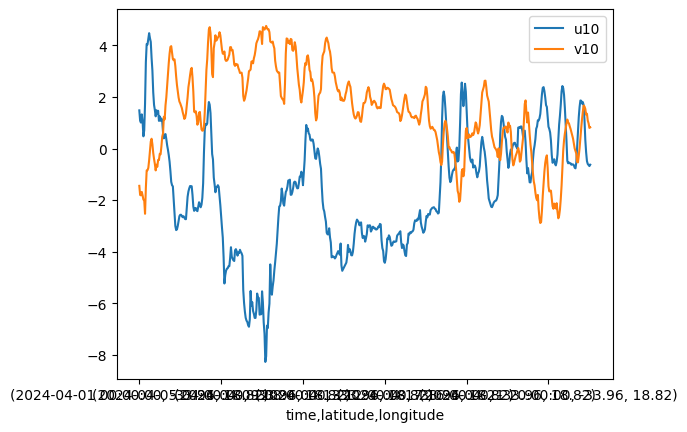

In [49]:
df.to